# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

from sklearn.base import BaseEstimator, RegressorMixin
from numpy.linalg import inv


class CustomLinearRegression(BaseEstimator, RegressorMixin):
  def fit(self, X, y, alpha: float = 0.01):
    X = np.column_stack((X, np.ones(X.shape[0]).astype(float)))
    self.w = inv((X.transpose() @ X + alpha * np.eye(X.shape[1]))) @ X.transpose() @ y
    return self

  def predict(self, X, is_added_bias: bool = False):
    X = np.column_stack((X, np.ones(X.shape[0]).astype(float)))
    return X @ self.w

8.275662172793435 98.02806814941923


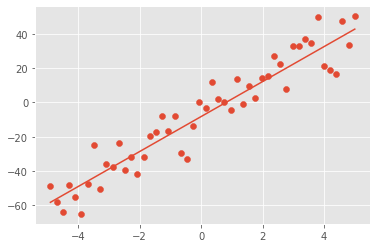

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = CustomLinearRegression().fit(X_train, y_train).predict(X_test)
print(mean_absolute_error(y_pred, y_test), mean_squared_error(y_pred, y_test))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

8.275820571984966 98.02959693428522


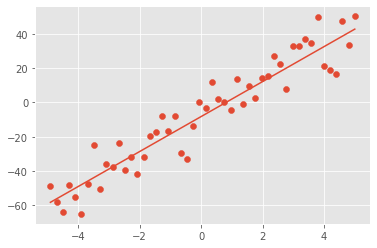

In [ ]:
from sklearn.linear_model import LinearRegression
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)
print(mean_absolute_error(y_pred, y_test), mean_squared_error(y_pred, y_test))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

0.4242301906637897 0.2532101896492624


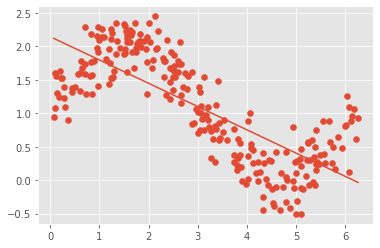

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
# print(data['x_train'].reshape(-1, 1).shape, data['y_train'].reshape(1, -1).shape)
reshaped_x_train = data['x_train'].reshape(-1, 1)

y_pred = LinearRegression().fit(reshaped_x_train, data['y_train']).predict(reshaped_x_train)
plt.scatter(data['x_train'], data['y_train'])
plt.plot(data['x_train'], y_pred)
print(mean_absolute_error(y_pred, data['y_train']), mean_squared_error(y_pred, data['y_train']))


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
class PolinomialRegression(BaseEstimator, RegressorMixin):

  def fit(self, X, y, X_degrees, alpha=0.01):
    self.X_degrees = X_degrees
    self.X_train = np.empty([X.shape[0], X_degrees.sum() + 1])
    count = 0
    for degree_idx in range(X_degrees.shape[0]):
      if X_degrees[degree_idx] == 0:
        continue
      for i in range(X_degrees[degree_idx] + 1):
        self.X_train[:, count] = X[:, degree_idx] ** i
        count += 1
    self.w = inv((self.X_train.transpose() @ self.X_train + alpha * np.eye(self.X_train.shape[1]))) @ self.X_train.transpose() @ y
    return self

  def predict(self, X):
    self.X_test = np.empty([X.shape[0], self.X_degrees.sum() + 1])
    count = 0
    for degree_idx in range(self.X_degrees.shape[0]):
      if self.X_degrees[degree_idx] == 0:
        continue
      for i in range(self.X_degrees[degree_idx] + 1):
        self.X_test[:, count] = X[:, degree_idx] ** i
        count += 1        
    return self.X_test @ self.w

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

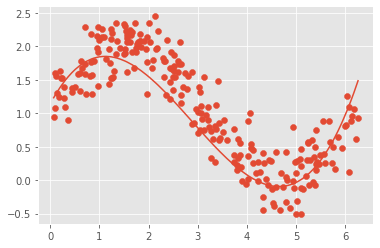

In [ ]:
# 3 dimensions test
y_pred = PolinomialRegression().fit(reshaped_x_train, reshaped_y_train, np.array([3])).predict(reshaped_x_train)
plt.scatter(data['x_train'], data['y_train'])
plt.plot(data['x_train'], y_pred)

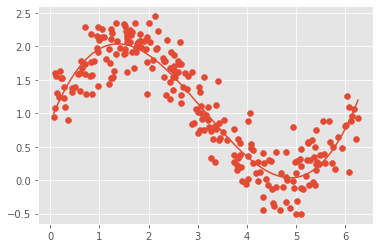

In [ ]:
# Because the linear regression is 
# a special case of polinomial regression,
# we can easyly use PolinomialFeatures to scale LR up to PR

from sklearn.preprocessing import PolynomialFeatures

PF_3_reshaped_x_train = PolynomialFeatures(3).fit_transform(reshaped_x_train)

y_pred = LinearRegression().fit(PF_3_reshaped_x_train, data['y_train']).predict(PF_3_reshaped_x_train)
plt.scatter(data['x_train'], data['y_train'])
plt.plot(data['x_train'], y_pred)

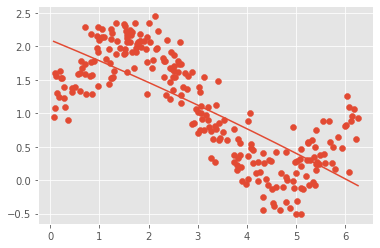

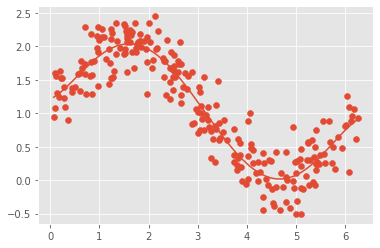

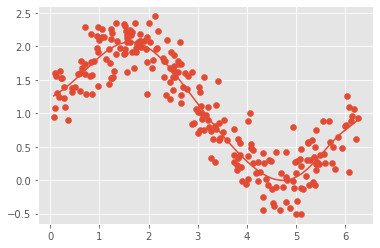

In [ ]:
# Lets check other number of features:
# 2
fig2 = plt.figure()
poly2 = fig2.add_subplot()
pred2 = PolinomialRegression().fit(reshaped_x_train, data['y_train'], np.array([2])).predict(reshaped_x_train)
poly2.scatter(data['x_train'], data['y_train'])
poly2.plot(data['x_train'], pred2)

# 5
fig5 = plt.figure()
poly5 = fig5.add_subplot()
pred5 = PolinomialRegression().fit(reshaped_x_train, data['y_train'], np.array([5])).predict(reshaped_x_train)
poly5.scatter(data['x_train'], data['y_train'])
poly5.plot(data['x_train'], pred5)

# 13
fig10 = plt.figure()
poly10 = fig10.add_subplot()
pred10 = PolinomialRegression().fit(reshaped_x_train, data['y_train'], np.array([10])).predict(reshaped_x_train)
poly10.scatter(data['x_train'], data['y_train'])
poly10.plot(data['x_train'], pred10)



Для решения задачи нам нужно найти полином наименьшей степени, который наиболее верно будет отображать закономерность представленных данных. С повышением степени полинома наши предсказания будут сильнее зависеть от шума в полученных данных.
  
Мой выбор –– это полином 3ей степени. С его помощью мы можем отобразить присутствущее 2 экстремума и, как следствие, показать синусоидальную зависимость на заданном отрезке.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()
info_house_data = pd.DataFrame(data=house_data.data,
                     columns=house_data.feature_names)
info_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Задание 3.4

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

lr_full = CustomLinearRegression().fit(X_train, y_train)
y_pred = lr_full.predict(X_test)
print('Error MAE:', mean_absolute_error(y_pred, y_test), 'Error MSE:', mean_squared_error(y_pred, y_test))

Error MAE: 3.3843078564678795 Error MSE: 23.897773515880726


In [ ]:
# 0 CRIM - per capita crime rate by town
# 1 ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# 2 INDUS - proportion of non-retail business acres per town.
# 3 CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 4 NOX - nitric oxides concentration (parts per 10 million)
# 5 RM - average number of rooms per dwelling
# 6 AGE - proportion of owner-occupied units built prior to 1940
# 7 DIS - weighted distances to five Boston employment centres
# 8 RAD - index of accessibility to radial highways
# 9 TAX - full-value property-tax rate per $10,000
# 10 PTRATIO - pupil-teacher ratio by town
# 11 B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 12 LSTAT - % lower status of the population

In [74]:
feature_mask = [4, 5, 7, 9, 10, 11, 12]
X_train_main = X_train[:, feature_mask]
X_test_main = X_test[:, feature_mask]
y_pred = CustomLinearRegression().fit(X_train_main, y_train).predict(X_test_main)
print('Error MAE:', mean_absolute_error(y_pred, y_test), 'Error MSE:', mean_squared_error(y_pred, y_test))

Error MAE: 3.371075016157593 Error MSE: 24.642128060040065


In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

Для усеченного датасета мы немного ухудшаем точность наших предсказаний, но делаем процесс обучения и предсказания более быстрым и менее затратным по памяти.